# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
```


*   scatterplot

      Un scatterplot représente un nuage de points, il est utilisé pour analyser les relations entre les variables. Cela permet donc d'identifier des modèles.

*   barplot

      Un barplot, ou graphique à barre, est une représentation graphique horizontale ou bien verticale permettant d'afficher et de comparer des catégories de données. La longeur/hauteur de chaque barre correspond au nombre d'occurences ou bien à la valeur de la catégorie correspondante.



*   boxplot

      Un boxplot, (boite à moustache)permet de résumer une variable de manière simple et visuelle, d'identifier les valeur extremes, et de comprendre la répartition des observations.


*   violinplot

      Assez similaire au box plot, un violinplot permet de visualiser la distribution numérique de différentes variables.  L’avantage d’un tracé de violon est qu’il peut montrer des nuances dans la distribution qui ne sont pas perceptibles dans une boîte à moustaches.


*   histogramme

    Un histogramme permet de représenter la répartition empirique d'une variable. Le graphique est composé de barres, dont leurs taille est proportionelle à la valeur de la variable.








# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
TSV (Tabulation separated value)
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name: Nom de l'organisme.
Kingdom: Division taxonomique (répartition d'un ensemble en catégorie hiérarchisées)
Group: Groupes d'organismes communs.
Subgroup: représente un niveau de taxonomy inferieur.

Size: Taille estimée du genome
Chrs: Nombre de chromosomes
Organelles: Nombres d'organelles (Petite structure interne différenciée de la cellule vivante et délimitée par une membrane.)
Plasmids: Nombres de plasmids (petite partie circulaire de l'adn)
Bioprojects: Nombres de projets de séquençage de génomes.


```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [4]:
path = 'gdrive/MyDrive/overview.txt'
import csv
with open(path, newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter = '\t')
  count = -1
  for e in spamreader:
    count += 1;
  print(count)

87888


87888

### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Le royaume en taxonomy (règne) est l'un des niveaux hiérarchiques majeures de la classification des êtres vivants. On retrouve traditionellement 5 royaumes, Monera, Prostista, Fungi, Plantae, et Animalia.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
On retrouve 4 royaumes dans la base,
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [5]:
import pandas as pd

buf = pd.read_csv(path, sep = '\t')

kingdom = buf['Kingdom']
kingdomUnique = kingdom.unique()

dictionnary = dict()

for e in kingdom:
  dictionnary[e] = 0

#print(dictionnary)

for e in kingdom:
  dictionnary[e] += 1

print(dictionnary)


{'Bacteria': 37492, 'Viruses': 32573, 'Eukaryota': 15560, 'Archaea': 2263}


<ipython-input-5-5553c8a7695f>:5: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  buf = pd.read_csv(path, sep = '\t')


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Un groupe représente un ensemble d'organismes partageant des caractéristiques communes
```

Q9. Combien de groupes sont présents par royaume ?

In [14]:
group = buf['Group']

nbgroups = buf.groupby("Kingdom")["Group"].nunique()

print(nbgroups)



Kingdom
Archaea      11
Bacteria     37
Eukaryota     5
Viruses       8
Name: Group, dtype: int64


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [16]:
group = buf['Group']



grpby = buf.groupby(group)['Kingdom'].count()

#print(grpby)
nbgroups = buf.groupby("Kingdom")["Group"].value_counts()

print(nbgroups)

Kingdom  Group                        
Archaea  Euryarchaeota                    1035
         Candidatus Thermoplasmatota       432
         TACK group                        408
         DPANN group                       249
         Asgard group                       61
                                          ... 
Viruses  Satellites                         65
         dsRNA viruses                      30
         unclassified archaeal viruses      15
         Deltavirus                         10
         unclassified virophages             3
Name: count, Length: 61, dtype: int64


## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

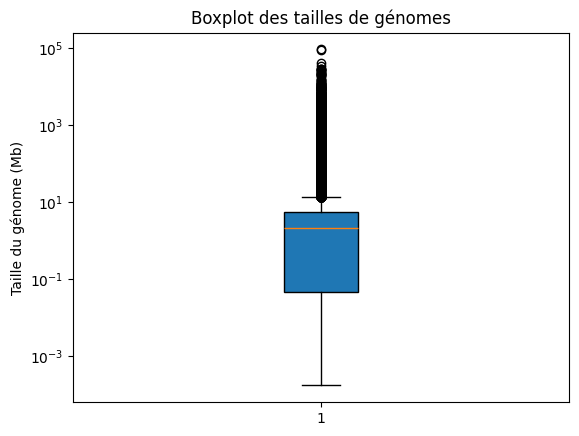

In [42]:
import matplotlib.pyplot as plt

buf["Size (Mb)"] = pd.to_numeric(buf["Size (Mb)"], errors = "coerce")

buf_clean = buf.dropna(subset=["Size (Mb)"])

plt.figure()

plt.boxplot(buf_clean["Size (Mb)"], vert=True, patch_artist=True, showfliers=True)

plt.yscale("log")
plt.ylabel("Taille du génome (Mb)")
plt.title("Boxplot des tailles de génomes")

plt.show()

Q12. Affichez la distribution par royaume.

<Figure size 640x480 with 0 Axes>

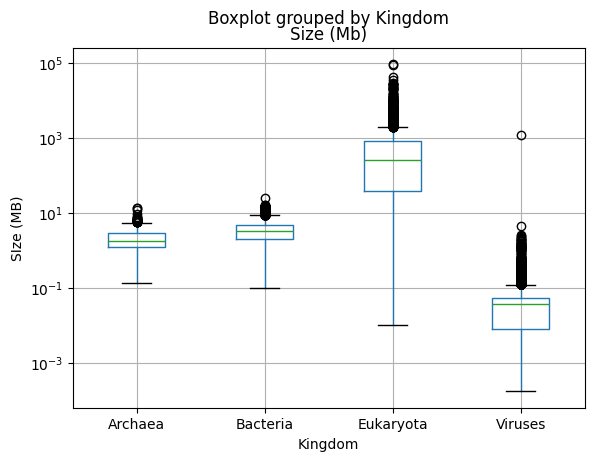

In [26]:
plt.figure()
buf.boxplot(column="Size (Mb)", by="Kingdom")
plt.yscale("log")
plt.ylabel("SIze (MB)")

plt.show()



Q13. Affichez la distribution par groupe pour chaque royaume.

<Figure size 640x480 with 0 Axes>

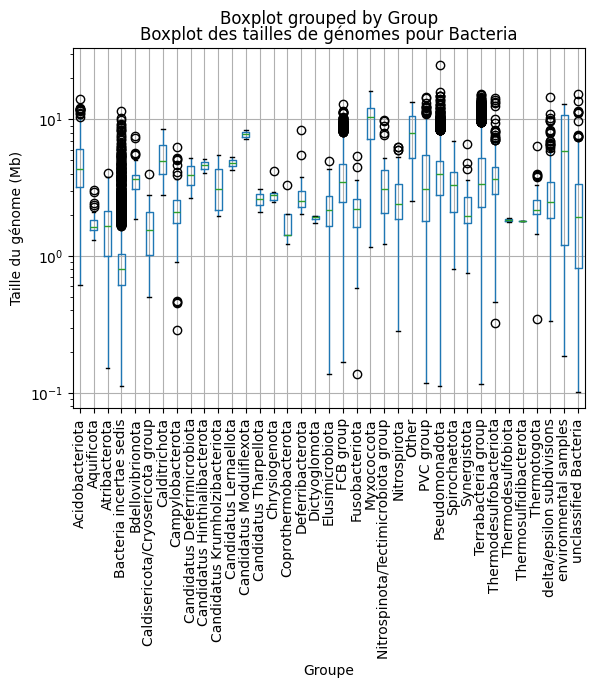

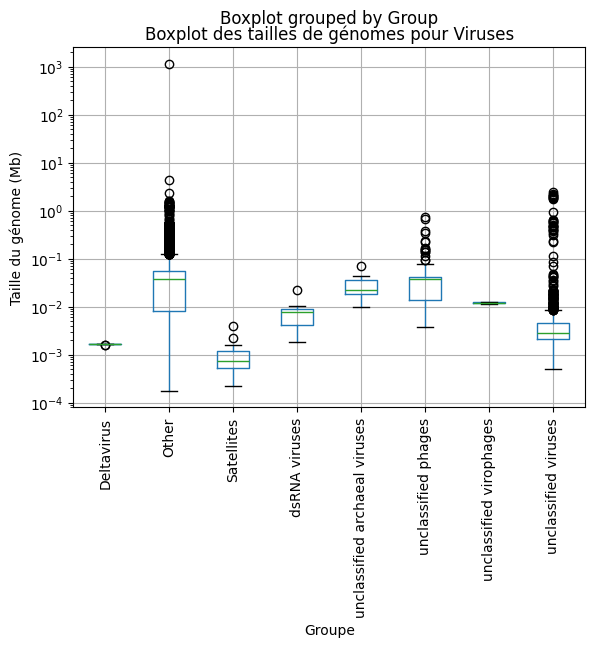

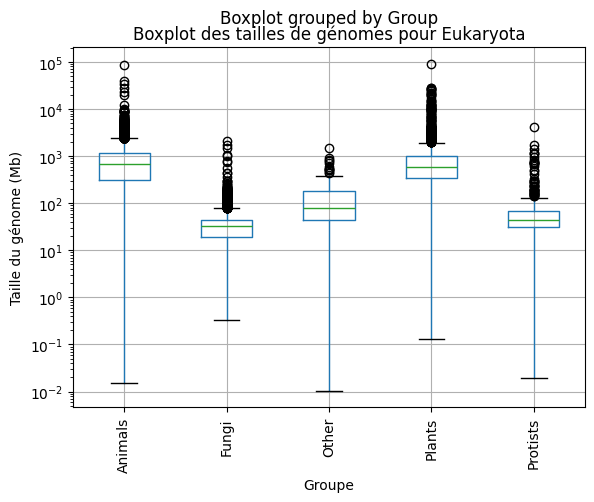

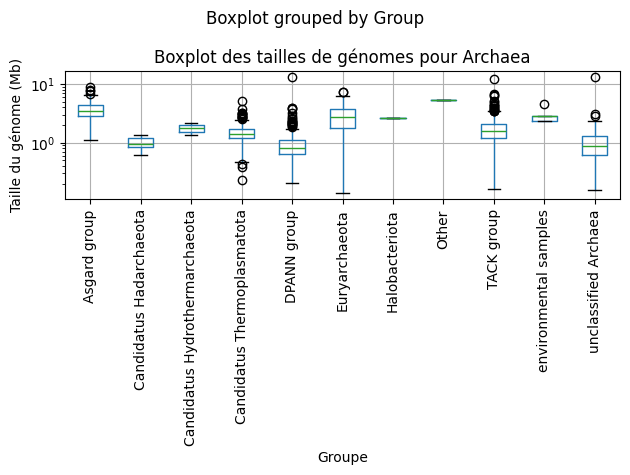

In [41]:
kingdoms = buf["Kingdom"].unique()
num_kingdoms = len(kingdoms)

plt.figure()

for i, kingdom in enumerate(kingdoms, 1):
    df_subset = buf[buf["Kingdom"] == kingdom]
    df_subset.boxplot(column="Size (Mb)", by="Group")
    plt.yscale("log")
    plt.xlabel("Groupe")
    plt.xticks(rotation=90)
    plt.ylabel("Taille du génome (Mb)")
    plt.title(f"Boxplot des tailles de génomes pour {kingdom}")

plt.tight_layout()
plt.show()


Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [38]:
smallest_genomes = buf.groupby("Kingdom")[["#Organism/Name", "Size (Mb)"]].min()

print(smallest_genomes)

                               #Organism/Name  Size (Mb)
Kingdom                                                 
Archaea    ANME-1 cluster archaeon AG-394-G06   0.137797
Bacteria         'Brassica napus' phytoplasma   0.101587
Eukaryota                   Aaosphaeria arxii   0.010223
Viruses                          ANMV-1 virus   0.000174


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [39]:
largest_genomes = buf.groupby("Kingdom")[["#Organism/Name", "Size (Mb)"]].max()

print(largest_genomes)

                                      #Organism/Name   Size (Mb)
Kingdom                                                         
Archaea    uncultured marine group III euryarchaeote     13.3999
Bacteria           unidentified prokaryotic organism     25.1426
Eukaryota                       uncultured eukaryote  91113.7000
Viruses                 white sturgeon herpesvirus 2   1150.6800


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

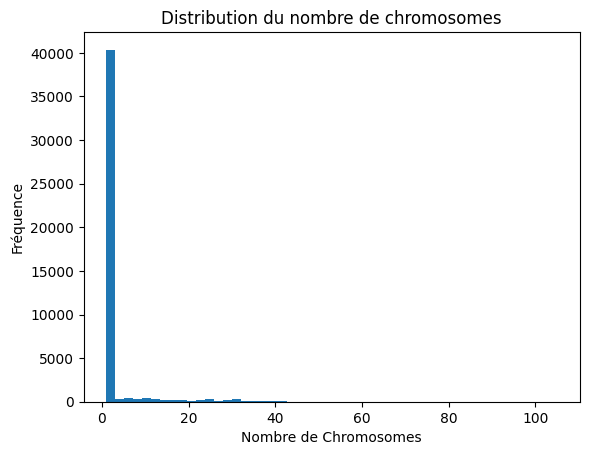

In [45]:
plt.figure()
plt.hist(buf["Chrs"], bins=50)
plt.xlabel("Nombre de Chromosomes")
plt.ylabel("Fréquence")
plt.title("Distribution du nombre de chromosomes")

plt.show()

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

<Figure size 640x480 with 0 Axes>

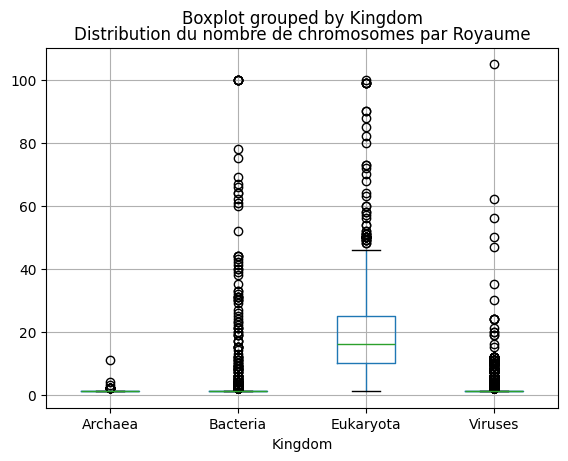

In [46]:
plt.figure()
buf.boxplot(column="Chrs", by="Kingdom")
plt.title("Distribution du nombre de chromosomes par Royaume")

plt.show()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Votre réponse ici
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

In [ ]:
#Votre code ici

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

In [ ]:
#Votre code ici

Q21. Qu’observez-vous ?

```markdown
Votre réponse ici
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Votre réponse ici
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q24. Qu'observez-vous ?

```markdown
Votre réponse ici
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Votre réponse ici
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q27. Combien d'organismes ont 0 projets ?

In [ ]:
#Votre code ici

Q28. Combien d'organismes ont > 1 projets ?

In [ ]:
#Votre code ici

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [ ]:
#Votre code ici

Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [ ]:
#Votre code ici

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [ ]:
#Votre code ici

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [ ]:
#Votre code ici

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [ ]:
#Votre code ici

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici